## Primeira parte da Nac1 - 1º Semestre

**Rubricas a serem atendidas neste notebook:**
*   **R1**: Nota 6
*   **R2**: Nota 8

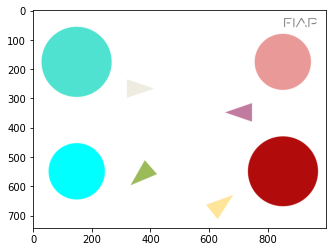

In [47]:
%matplotlib inline
# Importando a biblioteca OpenCV, Numpy e o PyPlot da MatPlotLib para uso
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#carrega a imagem do circulo
image = cv2.imread("circulo.png")

#Converte as cores da imagem de BGR(Blue, Green, Red) para RGB(Red, Green, Blue)
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB);

#exibe a imagem
plt.imshow(img)
plt.show()

## R1 - NOTA 6: Use a imagem **circulo.png** para implementar um código que:
* Segmenta apenas os círculos maiores da imagem, use a técnica que achar melhor. E exibe o resultado. **(máx 3 pontos)** 
* Exibe na imagem a área e o centro de massa dos dois círculos segmentados da imagem. O resultado esperado e uma imagem com um marcação no centro indicando o CM e o valor da área; **(máx 3 pontos)**

CM:  851 548 Área:  43920.0
CM:  148 176 Área:  44124.0


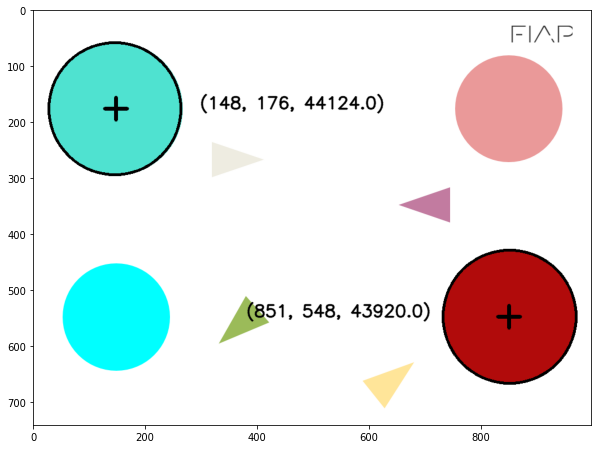

In [48]:
%matplotlib inline
# Importando a biblioteca OpenCV, Numpy e o PyPlot da MatPlotLib para uso
import cv2 
import numpy as np
from matplotlib import pyplot as plt

#Declaração das variaveis utilizadas no código
img = cv2.imread('circulo.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray,5)
saida = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#detecta os circulos maiores e circula eles
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,param1=30,param2=80,minRadius=100,maxRadius=0)
circulosDetectados = np.uint16(np.around(circles))
for (x, y, r) in circulosDetectados[0,:]:
    cv2.circle(saida,(x, y), r,(0,0,0),3)
    
# Definição dos valores minimo e max da mascara azul
blue_lower_hsv = np.array([70, 150, 210])  
blue_upper_hsv = np.array([100, 255, 240])

# Definição dos valores minimo e max da mascara vermelha
red_lower_hsv = np.array([0, 220, 160])  
red_upper_hsv = np.array([20, 255, 255])

# Aplicando a máscara azul e vermelha na imagem
blue_mask_hsv = cv2.inRange(img_hsv, blue_lower_hsv, blue_upper_hsv)
red_mask_hsv = cv2.inRange(img_hsv, red_lower_hsv, red_upper_hsv)
both_mask_hsv = cv2.bitwise_or(blue_mask_hsv, red_mask_hsv)

# Identificando os contornos para uso posterior de calculo da área
contornos, _ = cv2.findContours(both_mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
mascara_rgb = cv2.cvtColor(both_mask_hsv, cv2.COLOR_GRAY2RGB)

# For para calcular a área e o CM, e imprimir na imagem de acordo com a posição do eixo X do CM,
# para que cada informação fique do lado do circulo correspondente
cxV = [] 
cyV = []
for i in contornos:
    
    area = cv2.contourArea(i)
    
    M = cv2.moments(i)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cxV.append(cx)
    cyV.append(cy)
    print("CM: ",cx, cy,"Área: ", area)
    
    tamnho = 20
    cor = (0,0,0)
    cv2.line(saida,(cx - tamnho,cy),(cx + tamnho,cy),cor,5)
    cv2.line(saida,(cx,cy - tamnho),(cx, cy + tamnho),cor,5)
    fonte = cv2.FONT_HERSHEY_SIMPLEX
    texto = cx, cy, area
    if cx <200:
        origem = (cx+150,cy)
    else:
        origem = (cx-470,cy)

    cv2.putText(saida, str(texto), origem, fonte,1,(0,0,0),2,cv2.LINE_AA)

plt.figure(figsize = (10,10))   
plt.imshow(saida)

## R2 - NOTA 8: Faz o **R1** e:
* Traça uma reta entre os dois centros dos círculos; **(máx 0,5 pontos)**
* Calcula o ângulo de inclinação da reta em relação ao plano horizontal, inclinação em graus. O resultado esperado é uma imagem com  uma reta entre centros e valor do ângulo exibido na tela;  **(máx 1,5 pontos)**

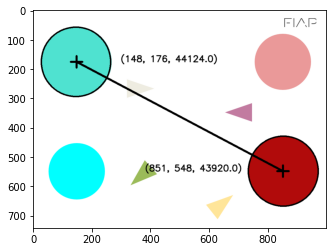

In [49]:
# Traça a reta
cor = (0, 0, 0)
vetorTamanho = len(cxV)
cv2.line(saida,(cxV[0],cyV[0]), (cxV[vetorTamanho-1], cyV[vetorTamanho-1]),cor,5)

plt.imshow(saida);
plt.show()

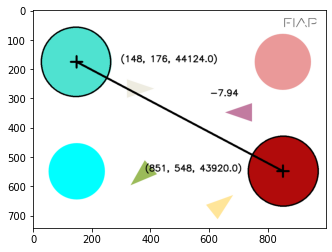

In [50]:
# Import math Library
import math

# Calcula e imprime o ângulo da reta
fonte = cv2.FONT_HERSHEY_SIMPLEX
cxT = cxV[0]-cxV[vetorTamanho-1]
cyT = cyV[0]-cyV[vetorTamanho-1]

angulo = angulo = math.atan2(cyV[0] - cyV[vetorTamanho-1], cxV[0] - cxV[vetorTamanho-1])
texto = str(round(math.degrees(angulo), 2))

origem = (cxT-100,cyT-80)
cv2.putText(saida, texto, origem, fonte,1,(0,0,0),2,cv2.LINE_AA)
plt.imshow(saida);
plt.show()